NLTK Preprocessing steps: Compare Text Analytics, NLP and Text Mining Text Analysis Operations using NLTK Tokenization Stopwords Lexicon Normalization such as Stemming and Lemmatization POS Tagging

In [1]:
#Import nltk and 'punkt' to used the .tokenized() method
import nltk
import os
# nltk.download('punkt')
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk import FreqDist

In [256]:
#Had issues with columns data type: 'float object is not iterable'
filepath = os.path.join('RT_CLEAN_DATA.csv')
df = pd.read_csv(filepath, encoding = "ISO-8859-1")
# df.head()

In [257]:
list(df)

['ï»¿Instructor Name (encoded)',
 'Instructor ID',
 'Learning Assignment: Completed On',
 'Learning Assignment: Learning Plan: Learning Plan Name',
 'Learning Assignment: Times Launched',
 'Learning Assignment: Learning Plan Section: Learning Plan Section Name',
 'Question Number',
 'Question Text',
 'Response Text Long',
 'Taught in Last 12 Months',
 'Avg. Score - Knowledge of the course content',
 'Avg. Score - Training and facilitation skills',
 'Number of Classes Taught',
 'Number of Attendees',
 'COUNT NAME',
 'CLEAN']

In [258]:
df.dtypes

ï»¿Instructor Name (encoded)                                               object
Instructor ID                                                               int64
Learning Assignment: Completed On                                          object
Learning Assignment: Learning Plan: Learning Plan Name                     object
Learning Assignment: Times Launched                                         int64
Learning Assignment: Learning Plan Section: Learning Plan Section Name     object
Question Number                                                             int64
Question Text                                                              object
Response Text Long                                                         object
Taught in Last 12 Months                                                     bool
Avg. Score - Knowledge of the course content                              float64
Avg. Score - Training and facilitation skills                             float64
Number of Classe

In [259]:
df.shape[0]

6240

In [260]:
df=df[df['Question Number']==9]

In [261]:
#For rows in column 'Response Text Long' set to lowercase
response_lower_case=[]

for idx, row in df.iterrows(): 
    lower=(str(row['Response Text Long'])).lower()
    response_lower_case.append(lower)

In [262]:
df['response_lower_case']=response_lower_case
df.head()

,ï»¿Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,Avg. Score - Knowledge of the course content,Avg. Score - Training and facilitation skills,Number of Classes Taught,Number of Attendees,COUNT NAME,CLEAN,response_lower_case
2496,11r4n0T5ck2r,577,2/1/2021,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,engaging the students,True,4.63,4.55,35,33,20,Clean,engaging the students
2497,12r3c0S4l4w,591,11/14/2020,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,"Humor, having fun with class.",True,4.71,4.71,1,17,20,Clean,"humor, having fun with class."
2498,1l2ks1ndr10Mâ rt2nss4n,605,11/10/2020,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,"being informal and joking, having a drwaing board",True,4.87,4.87,2,23,20,Clean,"being informal and joking, having a drwaing board"
2499,1l2x0Cr5z,618,2/23/2021,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,Play music during breaks,True,4.83,4.61,4,43,20,Clean,play music during breaks
2500,1l2x1ndr10R1tt16,612,1/4/2021,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,The interactive sessions,True,4.50,4.35,4,62,20,Clean,the interactive sessions


In [263]:
#Use tokenizer to divide a text into a list of sentences using an unsupervised algorithm 
#RegexpTokenizer splits a string into substrings using a regular expression - used this method because it removes punctuations
from nltk.tokenize import RegexpTokenizer

tokens_list=[]

tokenizer = RegexpTokenizer(r'\w+')
for idx, row in df.iterrows(): 
#     if row['What_can_SAI_make_easier_for_you__c']: 
    tokens=tokenizer.tokenize(str(row['response_lower_case']))
    tokens_list.append(tokens)

In [264]:
# #View tokens_list
# tokens_list

In [265]:
# len(tokens_list)

In [266]:
#Add tokenized list of words to df
df['tokenized_words']=tokens_list
# df=df.drop(columns=['tokenized_words_lower'])

df.head()

,ï»¿Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,Avg. Score - Knowledge of the course content,Avg. Score - Training and facilitation skills,Number of Classes Taught,Number of Attendees,COUNT NAME,CLEAN,response_lower_case,tokenized_words
2496,11r4n0T5ck2r,577,2/1/2021,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,engaging the students,True,4.63,4.55,35,33,20,Clean,engaging the students,"[engaging, the, students]"
2497,12r3c0S4l4w,591,11/14/2020,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,"Humor, having fun with class.",True,4.71,4.71,1,17,20,Clean,"humor, having fun with class.","[humor, having, fun, with, class]"
2498,1l2ks1ndr10Mâ rt2nss4n,605,11/10/2020,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,"being informal and joking, having a drwaing board",True,4.87,4.87,2,23,20,Clean,"being informal and joking, having a drwaing board","[being, informal, and, joking, having, a, drwa..."
2499,1l2x0Cr5z,618,2/23/2021,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,Play music during breaks,True,4.83,4.61,4,43,20,Clean,play music during breaks,"[play, music, during, breaks]"
2500,1l2x1ndr10R1tt16,612,1/4/2021,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,The interactive sessions,True,4.50,4.35,4,62,20,Clean,the interactive sessions,"[the, interactive, sessions]"


In [267]:
# Determine length of 'tokenized words'
df['tokenized_word_count']=df['tokenized_words'].str.len()

df.head()

,ï»¿Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,Avg. Score - Knowledge of the course content,Avg. Score - Training and facilitation skills,Number of Classes Taught,Number of Attendees,COUNT NAME,CLEAN,response_lower_case,tokenized_words,tokenized_word_count
2496,11r4n0T5ck2r,577,2/1/2021,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,engaging the students,True,4.63,4.55,35,33,20,Clean,engaging the students,"[engaging, the, students]",3
2497,12r3c0S4l4w,591,11/14/2020,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,"Humor, having fun with class.",True,4.71,4.71,1,17,20,Clean,"humor, having fun with class.","[humor, having, fun, with, class]",5
2498,1l2ks1ndr10Mâ rt2nss4n,605,11/10/2020,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,"being informal and joking, having a drwaing board",True,4.87,4.87,2,23,20,Clean,"being informal and joking, having a drwaing board","[being, informal, and, joking, having, a, drwa...",8
2499,1l2x0Cr5z,618,2/23/2021,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,Play music during breaks,True,4.83,4.61,4,43,20,Clean,play music during breaks,"[play, music, during, breaks]",4
2500,1l2x1ndr10R1tt16,612,1/4/2021,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,The interactive sessions,True,4.50,4.35,4,62,20,Clean,the interactive sessions,"[the, interactive, sessions]",3


In [268]:
#Apply stop words
from nltk.corpus import stopwords
# nltk.download('stopwords')
# Using stopwords from English Languages
stop_words = set(stopwords.words('english'))

In [269]:
# Itterate through df 'tokenized_words' for stop words
filtered_words_all=[]
for index, row in df.iterrows():
    filtered_words=[]
    tokenized_words=row['tokenized_words']
    for word in tokenized_words:
        if word not in stop_words:
            filtered_words.append(word)
    filtered_words_all.append(filtered_words)
print(filtered_words_all)   

[['engaging', 'students'], ['humor', 'fun', 'class'], ['informal', 'joking', 'drwaing', 'board'], ['play', 'music', 'breaks'], ['interactive', 'sessions'], ['show', 'use', 'safe', 'big', 'picture', 'wall'], ['class', 'participation', 'breaks', 'going', 'back', 'time', 'breaks', 'group', 'activities'], ['ask', 'questions'], ['icebreakers', 'keeping', 'light', 'relaxed', 'informal', 'inclusive'], [], ['discussions'], ['parking', 'lot', 'questions', 'specific', 'contextual', 'require', 'consulting', 'type', 'answers', 'would', 'park', 'come', 'back', 'end', 'hour'], ['energizers'], ['eat', 'together', 'lunch', 'afraid', 'possible', 'lot', 'interaction', 'get', 'know', 'attendees', 'better'], ['would', 'keep', 'open', 'questions', 'parking', 'lot', 'activities', 'using', 'digital', 'white', 'board', 'space'], ['share', 'experiences'], ['love', 'using', 'posters', 'safe', 'implementation', 'roadmap', 'scaled', 'agile', 'framework', 'safe', 'house', 'lean', 'safe', 'principles', 'something',

In [270]:
df['filtered_words']=filtered_words_all

In [271]:
# Word count of tokenized reponse
df['filtered_word_count']=df['filtered_words'].str.len()

df.head()

,ï»¿Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,Avg. Score - Knowledge of the course content,Avg. Score - Training and facilitation skills,Number of Classes Taught,Number of Attendees,COUNT NAME,CLEAN,response_lower_case,tokenized_words,tokenized_word_count,filtered_words,filtered_word_count
2496,11r4n0T5ck2r,577,2/1/2021,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,engaging the students,True,4.63,4.55,35,33,20,Clean,engaging the students,"[engaging, the, students]",3,"[engaging, students]",2
2497,12r3c0S4l4w,591,11/14/2020,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,"Humor, having fun with class.",True,4.71,4.71,1,17,20,Clean,"humor, having fun with class.","[humor, having, fun, with, class]",5,"[humor, fun, class]",3
2498,1l2ks1ndr10Mâ rt2nss4n,605,11/10/2020,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,"being informal and joking, having a drwaing board",True,4.87,4.87,2,23,20,Clean,"being informal and joking, having a drwaing board","[being, informal, and, joking, having, a, drwa...",8,"[informal, joking, drwaing, board]",4
2499,1l2x0Cr5z,618,2/23/2021,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,Play music during breaks,True,4.83,4.61,4,43,20,Clean,play music during breaks,"[play, music, during, breaks]",4,"[play, music, breaks]",3
2500,1l2x1ndr10R1tt16,612,1/4/2021,SAFe Remote Trainer,1,Lesson 3 - Learning and Engagement,9,What is something you do in your in-person tra...,The interactive sessions,True,4.50,4.35,4,62,20,Clean,the interactive sessions,"[the, interactive, sessions]",3,"[interactive, sessions]",2


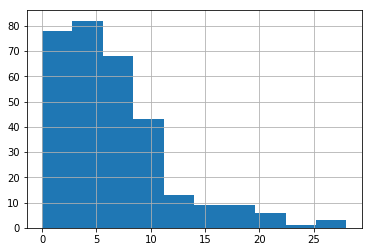

In [272]:
df['filtered_word_count'].hist()

In [273]:
# #Cannot pass an iterable list as an argument in WordNetLemmatizer, therefore needed to add the lists together
# toke_allWords = []
# for wordList in df['filtered_words']:
#     toke_allWords += wordList

In [274]:
# toke_allWords

In [275]:
# len(toke_allWords)

!!! Normalizing the Data - Stemming VS Lemmatization & Pos_tag!!!
Stemming is used to nomralize parts of text data - i.e. will shorten all conjugated verbs to the shortest length of characters possible. Lemmatization is used in NLP and will enable for words that do not have the same root to be grouped together in order for them to be processed as one item.

In [276]:
# #WordNetLemmtaizer is not iterable, thereofre we couldn't lemmatize individually
# lemmatizer = WordNetLemmatizer()

# #Lemmatize tokens1_stop
# lemmatized_output = [lemmatizer.lemmatize(w) for w in toke_allWords]
# print(lemmatized_output)

In [277]:
# len(lemmatized_output) #Doesn't appear to be any change with lemmatization

In [278]:
#Lemmatize with POS Tag
# from nltk import pos_tag
# from nltk.corpus import wordnet
# import nltk
# nltk.download('averaged_perceptron_tagger')

NLTK POS Tags Examples are as Below: https://www.guru99.com/pos-tagging-chunking-nltk.html#:~:text=Some%20NLTK%20POS%20tagging%20examples,tagging%20with%20NLTK%20is%20complete.

In [279]:
# #POS Tag = Parts of Speech Tagging is a process to mark up the words in text format
#*********!!Kept getting 'Function is note iterable' for POS_TAG!!***********

# tagged_words = []

# for word in df.loc[0, 'filtered_words']:
#     if word not in pos_tag:
#         filtered_word.append(word)

In [280]:
# tagged_words = pos_tag(df.loc[0, 'filtered_words'])
# print(tagged_words)

In [281]:
# #POS Tag = Parts of Speech Tagging is a process to mark up the words in text format
# tagged_words = pos_tag(lemmatized_output)
# print(tagged_words)

In [282]:
# #Create a dictionary of word frequency with Frequency Distribution?
# #Determine the frequency occurence of each word is column

# #Most common words in responses
# total_freq_dist_pos = FreqDist(tagged_words)
# print(total_freq_dist_pos.most_common(20))

Preparing Data for the Model 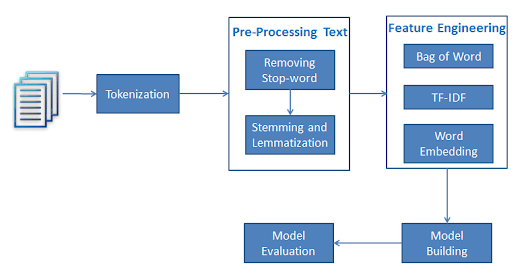

In [283]:
# #Create a dictionary of word frequency with Frequency Distribution?
# #Determine the frequency occurence of each word is column
# from nltk import FreqDist

# #Most common part of the column ''What_can_SAI_make_easier_for_you__c'.
# total_freq_dist_pos = FreqDist(tagged_words)
# print(total_freq_dist_pos.most_common(20))

Bag of Words -is a representation of text that describes the occurrence of words within a document. 

It involves two things:

A vocabulary of known words.
A measure of the presence of known words.

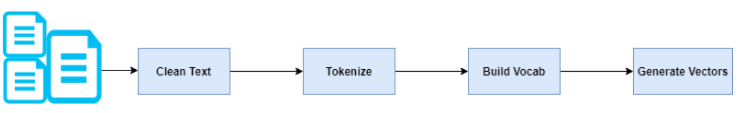

In [284]:
# df['tokenized_words'] =[" ".join(word) for word in df['tokenized_words'].values]

In [285]:
# df['filtered_words'] =[" ".join(word) for word in df['filtered_words'].values]

In [286]:
# df.head()

In [287]:
# TfidfVectorizer from sklearn wants sentences, not list of tokens

df['reconstructed']=df['filtered_words'].apply(lambda x: ' '.join(x))

In [288]:
#Calculate tf-idf scores using sklearn

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['reconstructed'])

In [289]:
type(x)

scipy.sparse.csr.csr_matrix

In [290]:
tfidf.vocabulary_

{'engaging': 213,
 'students': 641,
 'humor': 311,
 'fun': 276,
 'class': 99,
 'informal': 330,
 'joking': 358,
 'drwaing': 193,
 'board': 62,
 'play': 496,
 'music': 438,
 'breaks': 77,
 'interactive': 341,
 'sessions': 596,
 'show': 604,
 'use': 707,
 'safe': 581,
 'big': 59,
 'picture': 494,
 'wall': 727,
 'participation': 478,
 'going': 288,
 'back': 48,
 'time': 676,
 'group': 294,
 'activities': 9,
 'ask': 39,
 'questions': 532,
 'icebreakers': 316,
 'keeping': 364,
 'light': 392,
 'relaxed': 560,
 'inclusive': 325,
 'discussions': 183,
 'parking': 471,
 'lot': 404,
 'specific': 627,
 'contextual': 139,
 'require': 567,
 'consulting': 135,
 'type': 702,
 'answers': 34,
 'would': 754,
 'park': 470,
 'come': 116,
 'end': 206,
 'hour': 309,
 'energizers': 208,
 'eat': 197,
 'together': 681,
 'lunch': 407,
 'afraid': 15,
 'possible': 503,
 'interaction': 339,
 'get': 281,
 'know': 367,
 'attendees': 44,
 'better': 58,
 'keep': 363,
 'open': 459,
 'using': 708,
 'digital': 175,
 'whit

In [291]:
x.toarray() #this is what we'll training model will

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [292]:
#Check the result of maxtrix rom calculation
df_TF_IDF = pd.DataFrame(x.toarray(), 
columns=tfidf.get_feature_names())
print(df_TF_IDF)

           10       121   ability      able  according  acronym   actions  \
0    0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   
1    0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   
2    0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   
3    0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   
4    0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   
5    0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   
6    0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   
7    0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   
8    0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   
9    0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   
10   0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   
11   0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   

In [293]:
# df_TF_IDF

In [294]:
# df_TF_IDF.to_csv(r'TFIDF_Matrix.csv')

In [295]:
#This will untruncate everything i.e. it's going to show everything above
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [296]:
# #Check the result of maxtrix rom calculation

# df_TF_IDF = x.toarray(), 
# columns=tfidf.get_feature_names()
# print(df_TF_IDF)

Note: The high value for each word means the high term frequency weighted by rarity of term’s occurrences. We now understand how to calculate tf-idf.

In [297]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [298]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [299]:
df.columns

Index(['ï»¿Instructor Name (encoded)', 'Instructor ID',
       'Learning Assignment: Completed On',
       'Learning Assignment: Learning Plan: Learning Plan Name',
       'Learning Assignment: Times Launched',
       'Learning Assignment: Learning Plan Section: Learning Plan Section Name',
       'Question Number', 'Question Text', 'Response Text Long',
       'Taught in Last 12 Months',
       'Avg. Score - Knowledge of the course content',
       'Avg. Score - Training and facilitation skills',
       'Number of Classes Taught', 'Number of Attendees', 'COUNT NAME',
       'CLEAN', 'response_lower_case', 'tokenized_words',
       'tokenized_word_count', 'filtered_words', 'filtered_word_count',
       'reconstructed'],
      dtype='object')

In [317]:
test=df.loc[2540, 'Response Text Long']
if test==test: 
    print('not nan')
else: 
    print('nan')

nan


In [308]:
analyzer.polarity_scores(None)

TypeError: 'NoneType' object is not iterable

In [318]:
df['Vader']=df['Response Text Long'].apply(lambda x: analyzer.polarity_scores(x)['compound'] if x==x else 0)

In [323]:
X=df[['filtered_word_count', 'Vader']].reset_index(drop=True)
X=pd.concat([X, df_TF_IDF], axis=1)
y=df['Avg. Score - Training and facilitation skills'].reset_index(drop=True)

In [324]:
X_train, X_test, y_train, y_test=train_test_split(X, y)
lr=LinearRegression()
lr.fit(X_train, y_train)
print(f'Train Score: {lr.score(X_train, y_train)}')
print(f'Test Score: {lr.score(X_test, y_test)}')

Train Score: 0.9686286754367337
Test Score: -2.2637082503333685e+21


In [325]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
print(f'Train Score: {rf.score(X_train, y_train)}')
print(f'Test Score: {rf.score(X_test, y_test)}')

Train Score: 0.8248096164283356
Test Score: -0.024942510519827543


In [ ]:
# Bag of Words + Len of Response + Vader Score of Response are not good indicators of Training and Facilitation Skills


In [322]:
13: 'not good'
10: 'not good' -1.7554852661197273 & -0.23578451629152752

SyntaxError: illegal target for annotation (<ipython-input-322-0570a47bb7fa>, line 1)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
data = df_TF_IDF()
X, y, column_names = data['?'], data['?'], data['feature_names']
X = pd.DataFrame(X, columns = column_names)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 44)